In [ ]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
import lightgbm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pylab as plt

In [ ]:
!ls

sample_data  t_ws_h_p_ts.xlsx


In [ ]:
file_loc = 't_ws_h_p_ts.xlsx'
df = pd.read_excel(file_loc)
df.head()

,T,WS,H,P,TS
0,37,11,33,1006,1
1,33,15,49,1006,1
2,36,17,33,1009,1
3,36,11,33,1010,1
4,41,11,27,1010,1


In [ ]:
target_col = 'TS'
X = df.loc[: ,df.columns !=target_col]
y = df.loc[:, target_col]

In [ ]:
print(X.head())


    T  WS   H     P
0  37  11  33  1006
1  33  15  49  1006
2  36  17  33  1009
3  36  11  33  1010
4  41  11  27  1010


In [ ]:
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: TS, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((450, 4), (222, 4), (450,), (222,))

In [ ]:
train_data = lightgbm.Dataset(X_train, label=y_train)
valid_data = lightgbm.Dataset(X_test, label=y_test)

In [ ]:
parameters = {'objective': 'binary',
              'metric': 'auc',
              'boosting': 'gbdt',
              'num_leaves': 63,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1
             }

In [ ]:
model_lgbm = lightgbm.train(parameters,
                            train_data,
                            valid_sets=valid_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50)

[1]	valid_0's auc: 0.798474
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.818075
[3]	valid_0's auc: 0.819373
[4]	valid_0's auc: 0.818075
[5]	valid_0's auc: 0.818886
[6]	valid_0's auc: 0.818075
[7]	valid_0's auc: 0.821159
[8]	valid_0's auc: 0.818156
[9]	valid_0's auc: 0.818724
[10]	valid_0's auc: 0.818156
[11]	valid_0's auc: 0.819536
[12]	valid_0's auc: 0.818237
[13]	valid_0's auc: 0.819373
[14]	valid_0's auc: 0.817913
[15]	valid_0's auc: 0.817913
[16]	valid_0's auc: 0.816857
[17]	valid_0's auc: 0.815802
[18]	valid_0's auc: 0.81637
[19]	valid_0's auc: 0.81637
[20]	valid_0's auc: 0.817182
[21]	valid_0's auc: 0.817628
[22]	valid_0's auc: 0.820388
[23]	valid_0's auc: 0.819171
[24]	valid_0's auc: 0.817953
[25]	valid_0's auc: 0.817466
[26]	valid_0's auc: 0.816573
[27]	valid_0's auc: 0.816492
[28]	valid_0's auc: 0.816492
[29]	valid_0's auc: 0.815031
[30]	valid_0's auc: 0.814057
[31]	valid_0's auc: 0.813408
[32]	valid_0's auc: 0.811541
[33]	valid_0's auc: 0

In [ ]:
y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

print("AUC Train: {:.4f}\nAUC Test: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))

AUC Train: 0.8569
AUC Test: 0.8212


In [ ]:
f1_score(y_test,y_test_pred.round())

0.7123287671232876

In [ ]:
accuracy_score(y_test,y_test_pred.round())

0.7162162162162162

In [ ]:
confusion_matrix(y_test,y_test_pred.round())

array([[81, 30],
       [33, 78]])

In [ ]:
print('Precision: %f' % precision_score(y_test, y_test_pred.round()))
print('Recall: %f' % recall_score(y_test, y_test_pred.round()))

Precision: 0.722222
Recall: 0.702703


In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


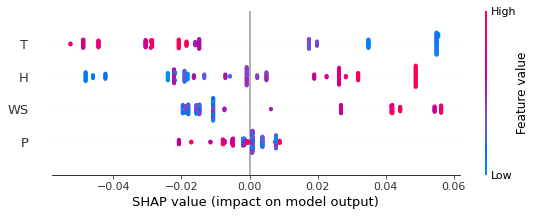

In [ ]:
explainer = shap.TreeExplainer(model_lgbm)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test)

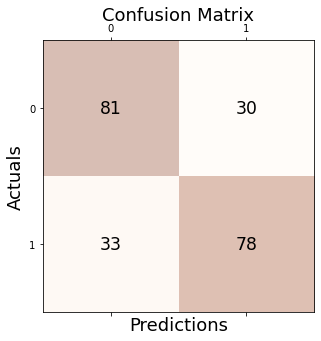

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
#
# Standardize the data set
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Fit the SVC model
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_test,y_test_pred.round())
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()